In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

Threshold Chi2:                  32910.91
Pobability of false alarm Chi2:  0.10
Probability of detection Chi2:   0.39
Receveiver operating curve Chi2: 0.39
Threshold CLT:                   32904.33
Pobability of false alarm CLT:   0.10
Probability of detection CLT:    0.39
Receveiver operating curve CLT:  0.39
Number of samples needed CLT:    1018.00


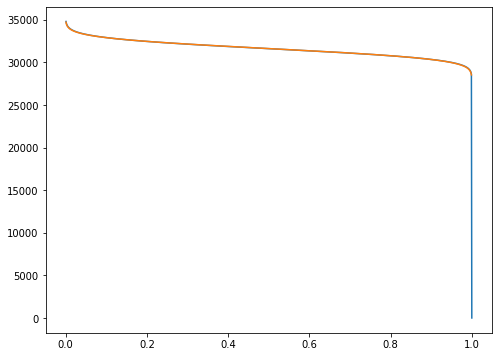

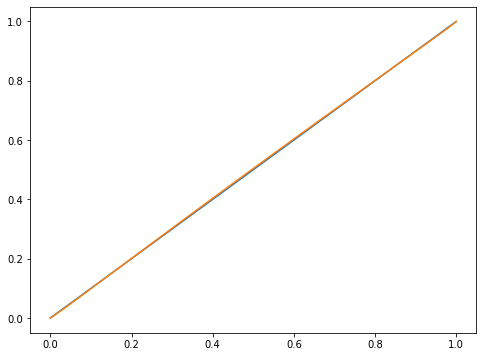

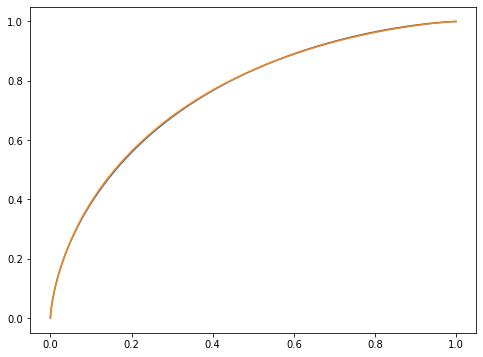

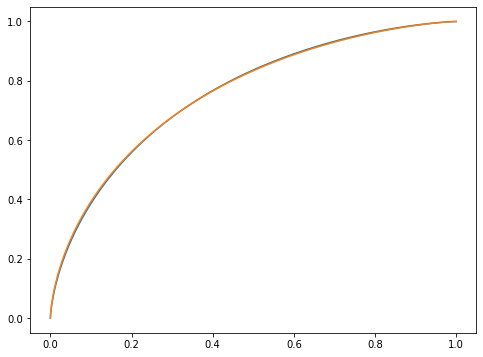

In [3]:
num_samples = 1000
noise_power = 15.
signal_power = 0.

################ Chi2 stats numbers ################
thr = ss.chi2_stats.get_thr(noise_power=noise_power,
                            pfa=0.1,
                            n=num_samples,
                            dB=True)
pfa = ss.chi2_stats.get_pfa(noise_power=noise_power,
                            thr=thr,
                            n=num_samples,
                            dB=True)

pd = ss.chi2_stats.get_pd(noise_power=noise_power,
                          signal_power=signal_power,
                          thr=thr,
                          n=num_samples,
                          dB=True)
roc = ss.chi2_stats.get_roc(noise_power=noise_power,
                            signal_power=signal_power,
                            pfa=pfa,
                            n=num_samples,
                            dB=True)
print('Threshold Chi2:                  %.2f' % (thr))
print('Pobability of false alarm Chi2:  %.2f' % (pfa))
print('Probability of detection Chi2:   %.2f' % (pd))
print('Receveiver operating curve Chi2: %.2f' % (roc))

################ Clt stats numbers ################
thr = ss.clt_stats.get_thr(noise_power=noise_power,
                            pfa=0.1,
                            n=num_samples,
                            dB=True)
pfa = ss.clt_stats.get_pfa(noise_power=noise_power,
                            thr=thr,
                            n=num_samples,
                            dB=True)
pd = ss.clt_stats.get_pd(noise_power=noise_power,
                          signal_power=signal_power,
                          thr=thr,
                          n=num_samples,
                          dB=True)
roc = ss.clt_stats.get_roc(noise_power=noise_power,
                            signal_power=signal_power,
                            pfa=pfa,
                            n=num_samples,
                            dB=True)
num = ss.clt_stats.get_num(noise_power=noise_power,
                           signal_power=signal_power,
                           pfa=pfa,
                           pd=pd,
                           dB=True)
print('Threshold CLT:                   %.2f' % (thr))
print('Pobability of false alarm CLT:   %.2f' % (pfa))
print('Probability of detection CLT:    %.2f' % (pd))
print('Receveiver operating curve CLT:  %.2f' % (roc))
print('Number of samples needed CLT:    %.2f' % (num))

################ Curves comparing chi2 and clt ################
pfa = np.linspace(0, 1, 1000)
thr = ss.chi2_stats.get_thr(noise_power=noise_power,
                            pfa=pfa,
                            n=num_samples,
                            dB=True)
thr_clt = ss.clt_stats.get_thr(noise_power=noise_power,
                               pfa=pfa,
                               n=num_samples,
                               dB=True)

plt.figure(figsize=(8, 6))
plt.plot(pfa, thr)
plt.plot(pfa, thr_clt)
plt.show()

pfa = ss.chi2_stats.get_pfa(noise_power=noise_power,
                            thr=thr,
                            n=num_samples,
                            dB=True)
pfa_clt = ss.clt_stats.get_pfa(noise_power=noise_power,
                               thr=thr,
                               n=num_samples,
                               dB=True)

plt.figure(figsize=(8, 6))
plt.plot(pfa, pfa)
plt.plot(pfa, pfa_clt)
plt.show()

pd = ss.chi2_stats.get_pd(noise_power=noise_power,
                          signal_power=signal_power,
                          thr=thr,
                          n=num_samples,
                          dB=True)
pd_clt = ss.clt_stats.get_pd(noise_power=noise_power,
                             signal_power=signal_power,
                             thr=thr,
                             n=num_samples,
                             dB=True)

plt.figure(figsize=(8, 6))
plt.plot(pfa, pd)
plt.plot(pfa, pd_clt)
plt.show()

roc = ss.chi2_stats.get_roc(noise_power=noise_power,
                            signal_power=signal_power,
                            pfa=pfa,
                            n=num_samples,
                            dB=True)
roc_clt = ss.clt_stats.get_roc(noise_power=noise_power,
                               signal_power=signal_power,
                               pfa=pfa,
                               n=num_samples,
                               dB=True)

plt.figure(figsize=(8, 6))
plt.plot(pfa, roc)
plt.plot(pfa, roc_clt)
plt.show()